# Time series prediction using LSTM

## Dataset
- Daily minimum temperatures in Melbourne, Australia, 1981-1990
- Units: Degrees Celcius

In [1]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np

Using TensorFlow backend.


## Question 1

### Load the data
- load daily-minimum-temperatures-in-me.csv

In [2]:
# # if you are using google colab
# from google.colab import files
# files.upload()

In [48]:
df = pd.read_csv('daily-minimum-temperatures-in-me.csv', index_col='Date')
# df.plot()

### Print the data
- First 5 rows only

In [49]:
print(df.head())

            Temperature
Date                   
1981-01-01         20.7
1981-01-02         17.9
1981-01-03         18.8
1981-01-04         14.6
1981-01-05         15.8


### Set index column
- Set the DataFrame index using "Date" column

In [50]:
df.index.names = ['Month']
df.sort_index(inplace=True)
print('Total rows: {}'.format(len(df)))
df.head()

Total rows: 3650


,Temperature
Month,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [6]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


## Question 2

### Check the total count of null values in the data

In [7]:
df.isnull().sum()

print("There are no null values in given dataset")

There are no null values in given dataset


### Drop all the rows with null values
- use dropna() method

## Question 3

### Describe your dataframe
- use describe() method

In [8]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


### Plot the dataframe
- use plot() method

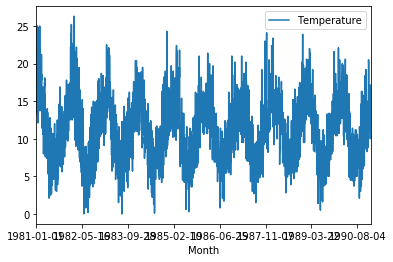

In [51]:
df.plot()

### Get representation of the distribution of data using histogram
- use hist() method

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000185F8E62CF8>]],
      dtype=object)

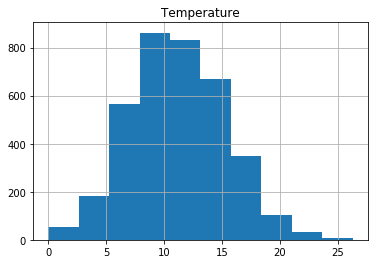

In [52]:
df.hist(bins=10)

### Check minimum and maximum temperature
- use min() and max() methods

In [53]:
df["Temperature"].min()

0.0

In [54]:
df["Temperature"].max()

26.3

## Question 4

### Split the dataset into training and testing
- training data: 75%
- testing data: 25%

In [55]:
train_split = len(df) * .75
train_split = int(train_split)
test_split = len(df) - train_split
print(train_split)

X_train = df[0:train_split]
# print("Train len..", len(X_train))
X_test = df[train_split:]

# print("Test len..", len(X_test))
# print(len(df))
# print(len(X_train) + len(X_test))

2737


### Normalize the data
- normalize temperature values using MinMaxScaler
- feature_range: 0-1
- fit MinMaxScaler on train data and transform it
  - use fit_transform() method
- transform test data using MinMaxScaler object
  - use transform() method

In [56]:
sc = MinMaxScaler(feature_range=(0, 1))
train = sc.fit_transform(X_train)
test = sc.transform(X_test)

In [15]:
# train = X_train.astype('float32')
# train_scaler = MinMaxScaler(feature_range=(0, 1))
# train_scaled = train_scaler.fit_transform(train)
# print('Train_Min', np.min(train_scaled))
# print('Train_Max', np.max(train_scaled))

# test = X_test.astype('float32')
# test_scaler = MinMaxScaler(feature_range=(0, 1))
# test_scaled = test_scaler.transform(test)
# print('Test_Min', np.min(test_scaled))
# print('Test_Max', np.max(test_scaled))

### Print scaled train and test data
- print only first 5 values

In [16]:
train[0:5]

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       [0.55513308],
       [0.60076046]])

In [17]:
test[0:5]

array([[0.22813688],
       [0.22053232],
       [0.18631179],
       [0.19011407],
       [0.31939163]])

## Question 5

### Create sequential data
Map the temperature at a particular day 'd' to the temperature at day t
'd+n', where n is any number you define.

For example: to map temperatures of consecutive days, use d+1, i.e. lookback = 1
- Below function takes data as input and returns sequential data.
- X as features and y as labels

In [57]:
import numpy as np
def create_seq_data(data, lookback=1):
    X, y = list(), list()

    for day in range((len(data)-lookback)):
        X.append(data[day: day+lookback, 0])
        y.append(data[day+lookback, 0])
    return np.array(X), np.array(y)

### Use the above function to create train and test sets
- Get X_train and y_train
- Get X_test and y_test
- lookback = 1

In [62]:
look_back = 1
X_train, y_train = create_seq_data(train, look_back)


In [63]:
X_test, y_test = create_seq_data(test, look_back)

### Reshape the data
- Reshape X_train and X_test
- use np.reshape() method
- this is to be done to make the data ready for input in model

In [64]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(2736, 1, 1)
(912, 1, 1)


### Print shape of data
- print shape of X_train and X_test

In [65]:
print("X_train shape :", X_train.shape)
print("X_test shape :", X_test.shape)

X_train shape : (2736, 1, 1)
X_test shape : (912, 1, 1)


## Question 6

### Define sequential model
- initialize a Sequential model
- add an LSTM layer
  - units: 10
  - stateful: True
  - pass a `batch_input_shape` argument to your layer
  - batch_input_shape: (batch_size, look_back, 1)
    - batch_size: 1
    - look_back: 1
- add Dense layer with 1 neuron

In [66]:
#create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(10, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))


## Question 7

### compile your model
- loss: mean_squared_error
- optimizer: adam

In [67]:
model.compile(loss='mean_squared_error', optimizer='adam')


### summarize your model
- use summary() method

In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (1, 10)                   480       
_________________________________________________________________
dense_2 (Dense)              (1, 1)                    11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


## Question 8

### fit your model
- epochs: 50
- batch_size: 1

In [69]:
model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/50
 - 17s - loss: 0.0214
Epoch 2/50
 - 16s - loss: 0.0127
Epoch 3/50
 - 17s - loss: 0.0114
Epoch 4/50
 - 17s - loss: 0.0109
Epoch 5/50
 - 15s - loss: 0.0104
Epoch 6/50
 - 17s - loss: 0.0102
Epoch 7/50
 - 16s - loss: 0.0103
Epoch 8/50
 - 15s - loss: 0.0102
Epoch 9/50
 - 15s - loss: 0.0102
Epoch 10/50
 - 15s - loss: 0.0103
Epoch 11/50
 - 14s - loss: 0.0103
Epoch 12/50
 - 14s - loss: 0.0102
Epoch 13/50
 - 13s - loss: 0.0101
Epoch 14/50
 - 14s - loss: 0.0102
Epoch 15/50
 - 15s - loss: 0.0100
Epoch 16/50
 - 14s - loss: 0.0101
Epoch 17/50
 - 15s - loss: 0.0100
Epoch 18/50
 - 17s - loss: 0.0100
Epoch 19/50
 - 14s - loss: 0.0101
Epoch 20/50
 - 16s - loss: 0.0100
Epoch 21/50
 - 16s - loss: 0.0100
Epoch 22/50
 - 15s - loss: 0.0100
Epoch 23/50
 - 14s - loss: 0.0100
Epoch 24/50
 - 14s - loss: 0.0100
Epoch 25/50
 - 14s - loss: 0.0101
Epoch 26/50
 - 15s - loss: 0.0100
Epoch 27/50
 - 16s - loss: 0.0100
Epoch 28/50
 - 13s - loss: 0.0100
Epoch 29/50
 - 15s - loss: 0.0100
Epoch 30/50
 - 15s - lo

## Question 9

### make predictions on train data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [70]:
trainPredict = model.predict(X_train, batch_size=batch_size)

### reset model state
- if you are using stateful=True in your model then you should call reset_states every time, when you want to make consecutive model calls independent.
- use reset_states() method

In [71]:
model.reset_states()

### make predictions on test data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [72]:
testPredict = model.predict(X_test, batch_size=batch_size)


In [38]:
# testPredict

## Question 10

### Inverse train predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [73]:
# invert predictions
trainPredict = sc.inverse_transform(trainPredict)
y_train = sc.inverse_transform([y_train])


### Inverse test predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [74]:
testPredict = sc.inverse_transform(testPredict)
y_test = sc.inverse_transform([y_test])




### Evaluate train predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print training RMSE

In [76]:
import math
from sklearn.metrics import mean_squared_error

In [79]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))


Train Score: 2.61 RMSE


### Evaluate test predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print testing RMSE

In [78]:
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 2.53 RMSE
